In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pylab import *

# 卷积计算过程

In [2]:

mm = np.zeros((3, 3))
m5 = np.mat([
    [1, -1, 6, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 5, 1, 1, 1],
    [0, 0, 1, 1, 0],
    [0, 5, 1, 0, 0]
])

m3 = np.mat([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

for i in range(3):
    for j in range(3):
        m = m5[i:i+3, j:j+3]
        t = (np.array(m)*np.array(m3))
        mm[i, j] = t.sum()
        print(m)
        print('    X')
        print(m3)
        print('-'*10)
        print(t)
        print('-'*14)
        print('\t',t.sum())
print(mm)

[[ 1 -1  6]
 [ 0  1  1]
 [ 0  5  1]]
    X
[[1 0 1]
 [0 1 0]
 [1 0 1]]
----------
[[1 0 6]
 [0 1 0]
 [0 0 1]]
--------------
	 9
[[-1  6  0]
 [ 1  1  1]
 [ 5  1  1]]
    X
[[1 0 1]
 [0 1 0]
 [1 0 1]]
----------
[[-1  0  0]
 [ 0  1  0]
 [ 5  0  1]]
--------------
	 6
[[6 0 0]
 [1 1 0]
 [1 1 1]]
    X
[[1 0 1]
 [0 1 0]
 [1 0 1]]
----------
[[6 0 0]
 [0 1 0]
 [1 0 1]]
--------------
	 9
[[0 1 1]
 [0 5 1]
 [0 0 1]]
    X
[[1 0 1]
 [0 1 0]
 [1 0 1]]
----------
[[0 0 1]
 [0 5 0]
 [0 0 1]]
--------------
	 7
[[1 1 1]
 [5 1 1]
 [0 1 1]]
    X
[[1 0 1]
 [0 1 0]
 [1 0 1]]
----------
[[1 0 1]
 [0 1 0]
 [0 0 1]]
--------------
	 4
[[1 1 0]
 [1 1 1]
 [1 1 0]]
    X
[[1 0 1]
 [0 1 0]
 [1 0 1]]
----------
[[1 0 0]
 [0 1 0]
 [1 0 0]]
--------------
	 3
[[0 5 1]
 [0 0 1]
 [0 5 1]]
    X
[[1 0 1]
 [0 1 0]
 [1 0 1]]
----------
[[0 0 1]
 [0 0 0]
 [0 0 1]]
--------------
	 2
[[5 1 1]
 [0 1 1]
 [5 1 0]]
    X
[[1 0 1]
 [0 1 0]
 [1 0 1]]
----------
[[5 0 1]
 [0 1 0]
 [5 0 0]]
--------------
	 12
[[1 1 1]
 [1

In [5]:
m5=m5*300
m5.max()

540000

In [6]:
np.array(m5).clip(0, m5.max())

array([[ 90000,      0, 540000,      0,      0],
       [     0,  90000,  90000,  90000,      0],
       [     0, 450000,  90000,  90000,  90000],
       [     0,      0,  90000,  90000,      0],
       [     0, 450000,  90000,      0,      0]])

In [7]:
Image.fromarray(m5)

In [8]:
mm

array([[  9.,   6.,   9.],
       [  7.,   4.,   3.],
       [  2.,  12.,   4.]])

In [9]:
Image.fromarray(mm.astype('uint8'))

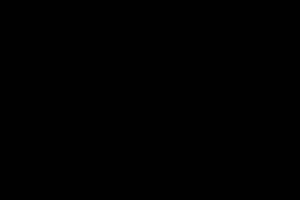

In [10]:
a = np.ones((200, 300))
Image.fromarray(a.astype('uint8'))

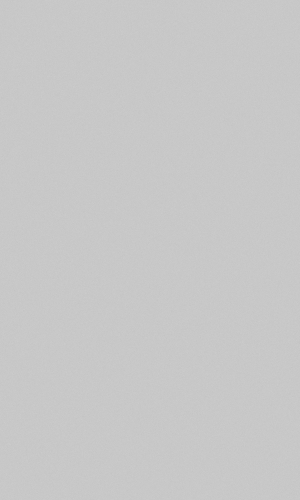

In [11]:
b = np.random.randn(500, 300)+200
Image.fromarray(b.astype('uint8'))

# PIL  处理图像

# 打开本地图像

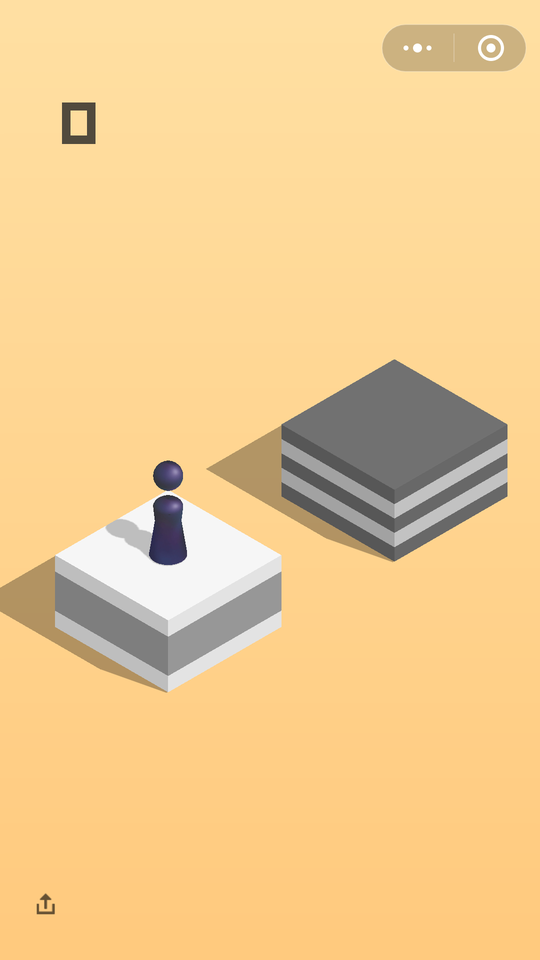

In [16]:
import os
imgfile = '/sdcard/1/img_base/1.png'
im = Image.open(imgfile)
w, h = im.size
# 缩放时带上Image.ANTIALIAS滤镜，图片质量不会失真
im = im.resize((w//2, h//2), Image.ANTIALIAS)
#im.thumbnail((w//2, h//2))
#im = im.convert('L')
im

# 拷贝，粘贴，合并

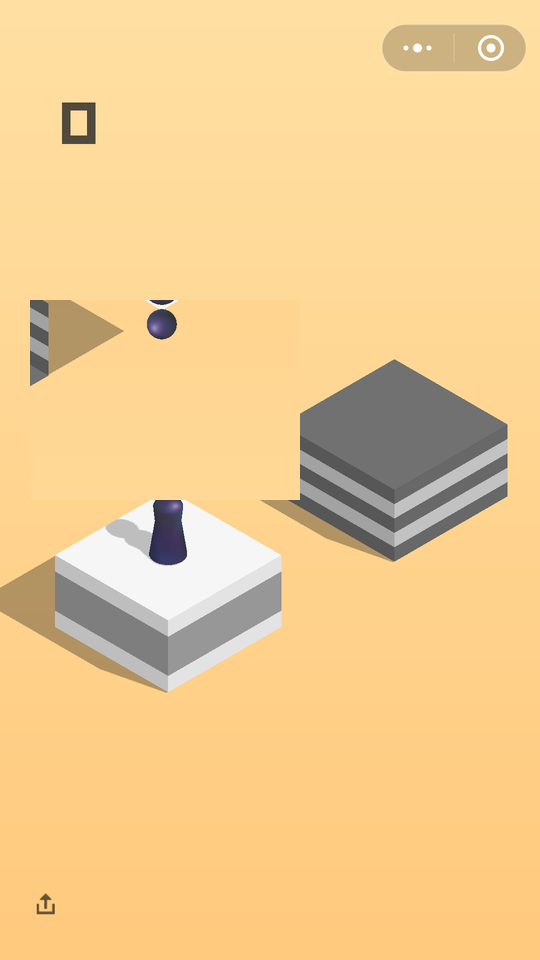

In [17]:
# 要拷贝的区域
box = (30, 300,300, 500 )
# 拷贝
region = im.crop(box)
# 旋转180度
region = region.transpose(Image.ROTATE_180 )
# 粘贴box.大小的区域，到原先的地方去
im.paste(region, box)
im

In [18]:
im.mode

'RGBA'

# R, G, B三个分道分离

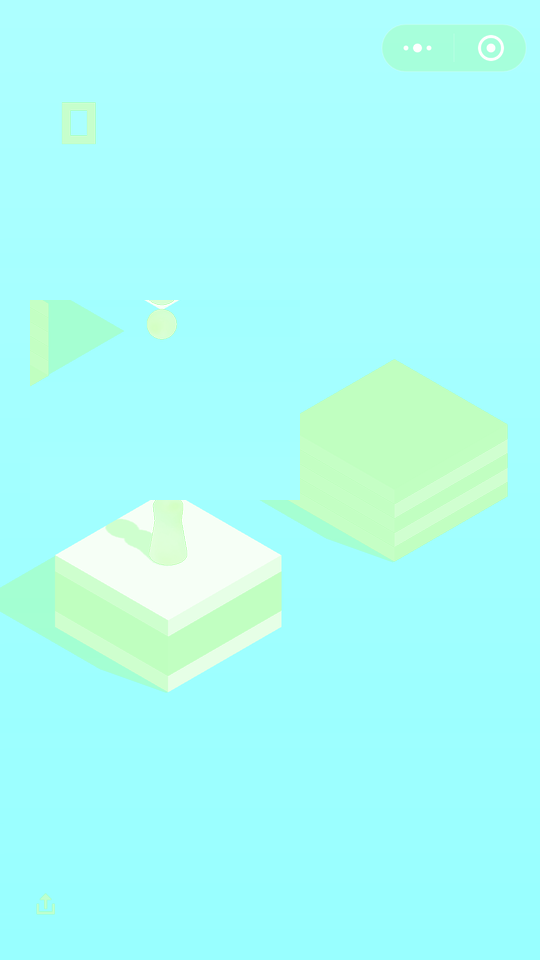

In [19]:
#im = im.convert()
# 通道分离
r, g, b ,a = im.split()
# 通道合并, 把b, r两个通道反转
im = Image.merge('RGBA', (b, a, r, g))
im

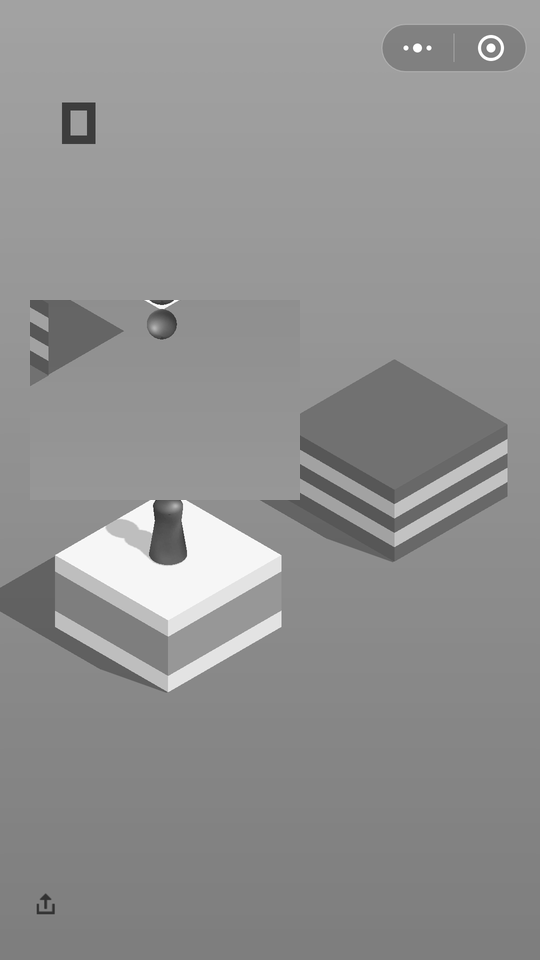

In [20]:
b

# 几何转变

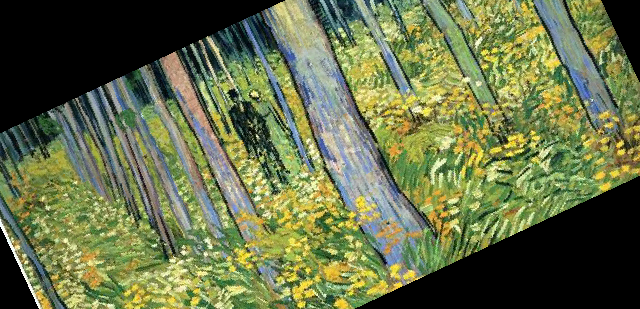

In [21]:
im2 = Image.open('/sdcard/1/img_base/0tree.jpg')
# 角度旋转
im2.rotate(25)


transpose()方法预定义了一些旋转方式，如
左右反转，上下翻转，逆时针旋转(90,180,270)度等，非常方便，rotate()和transpose()方法在表现上没有任何不同。

# 图片加强(滤镜)

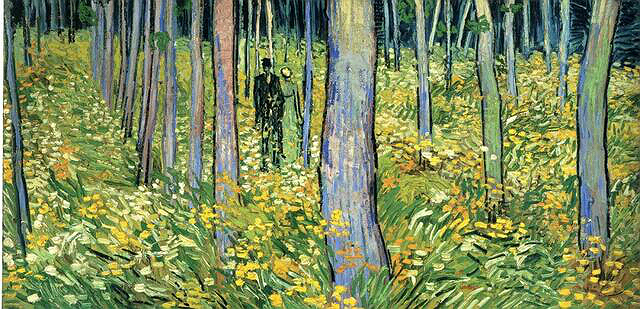

In [22]:
from PIL import ImageFilter

out = im2.filter(ImageFilter.DETAIL)
out

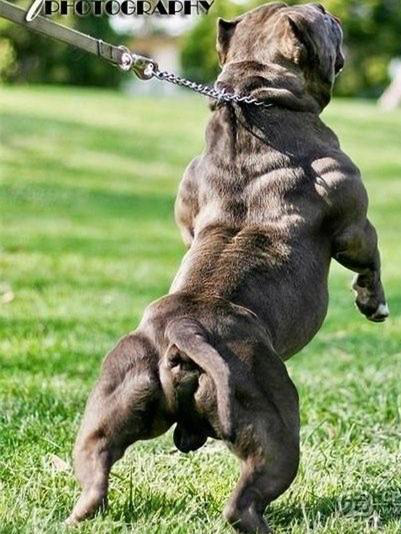

In [23]:
image = Image.open('/sdcard/1/img/dog.jpg')
image

几种滤镜方法

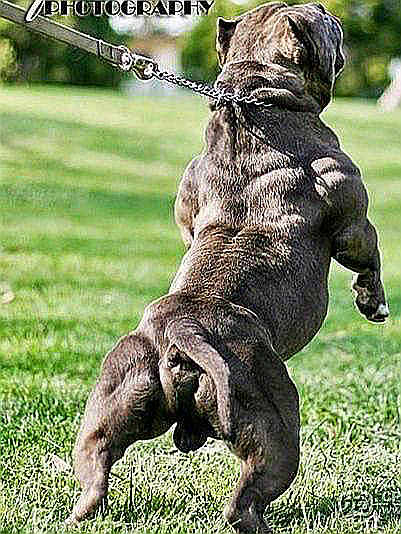

In [24]:

# image.filter(ImageFilter.DETAIL).show() # 真实效果展现
# image.filter(ImageFilter.BLUR).show()   # 以模糊化的效果展现
# image.filter(ImageFilter.CONTOUR).show()  # 以铅笔画的效果展现
# image.filter(ImageFilter.FIND_EDGES) # 以铅笔画黑色背景展示
im = image.filter(ImageFilter.EDGE_ENHANCE)  # 线条高亮的显示效果
# image.filter(ImageFilter.EDGE_ENHANCE_MORE).show()  # 强化线条高亮
# image.filter(ImageFilter.EMBOSS).show()  # 浮雕效果
# image.filter(ImageFilter.GaussianBlur).show()  # 也是模糊化的显示效果
# image.filter(ImageFilter.SMOOTH_MORE).show()
# image.filter(ImageFilter.GaussianBlur).save('Filter/GaussianBlur.jpg','jpeg')
im

直接操作像素点

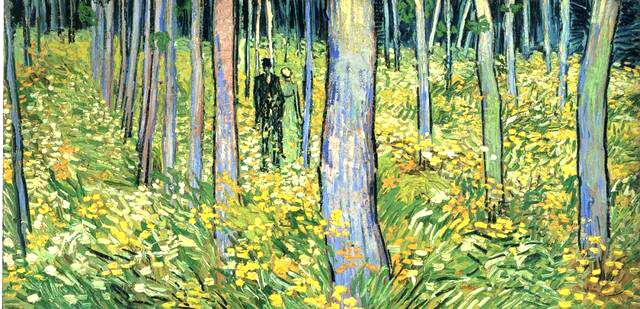

In [25]:
out = im2.point(lambda i: 1.2*i)
out

# 通道转换

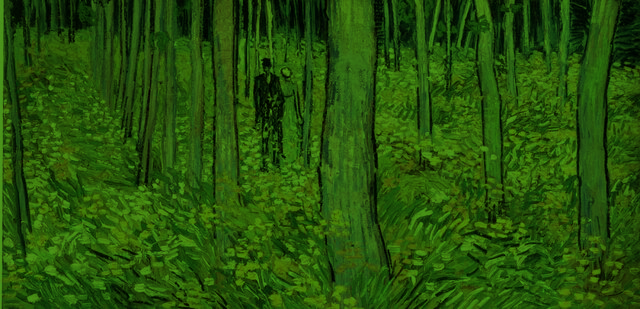

In [26]:
# 三通道分离
r, g, b = im2.split()
# 三通道转化为数组
rr, gg, bb= [np.array(i).astype('float') for i in [r, g, b ] ]

# L = R 299/1000 + G 587/1000+ B * 114/1000
# 数组转换为三通道图像
rrr,ggg,bbb = [Image.fromarray(i.astype('uint8')) for i in [rr*0.299, gg*0.587, bb*0.114]]

# 三通道合并
Image.merge(('RGB'), (rrr, ggg, bbb))

更高级的图片加强，可以使用ImageEnhance模块，其中包含了大量的预定义的图片加强方式

In [27]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im2)
enh.enhance(1.5).show('50% more contrast')

In [28]:
im.save('jump.png')
os.path.getsize('jump.png')/1024

525.1005859375

# PIL处理图像的九种模式

PIL中有九种不同模式。分别为1，L，P，RGB，RGBA，CMYK，YCbCr，I，F。

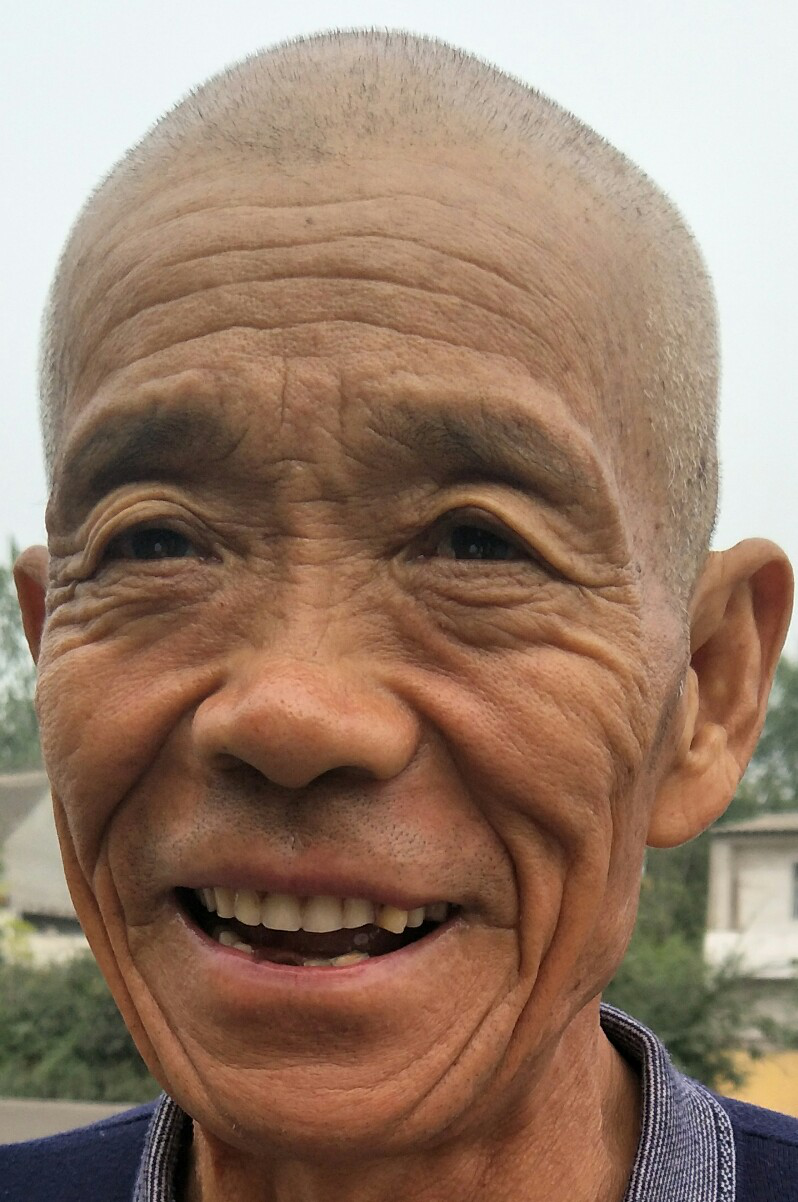

In [29]:
lena = Image.open('/sdcard/1/img/f10.jpg')
lena

1、模式“1”

模式“1”为二值图像，非黑即白。但是它每个像素用8个bit表示，0表示黑，255表示白。下面我们将lena图像转换为“1”图像

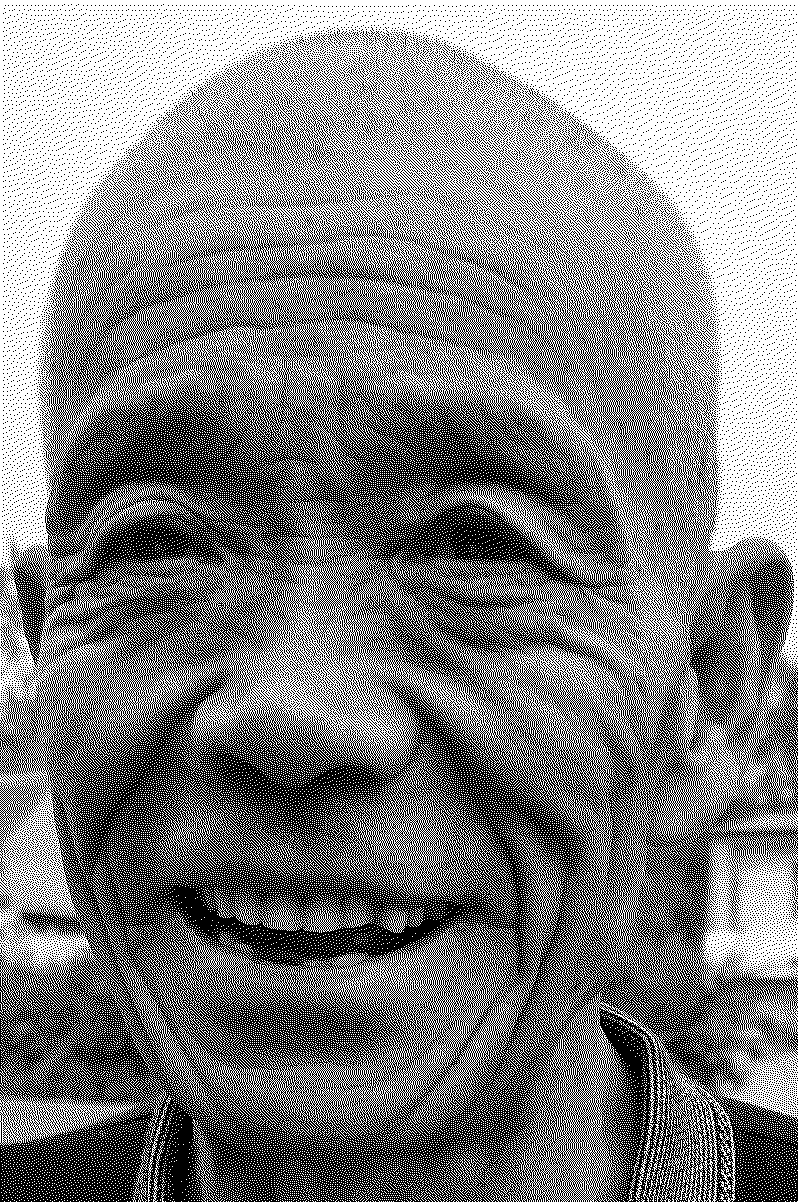

In [24]:
lena.convert('1')

2、模式“L”

模式L”为灰色图像，它的每个像素用8个bit表示，0表示黑，255表示白，其他数字表示不同的灰度。在PIL中，从模式“RGB”转换为“L”模式是按照下面的公式转换的：

L = R * 299/1000 + G * 587/1000+ B * 114/1000

下面我们将lena图像转换为“L”图像。

In [25]:
lena = Image.open('/sdcard/1/img/lena.jpg')
lena.getpixel((0, 0))
r, g, b= lena.split()

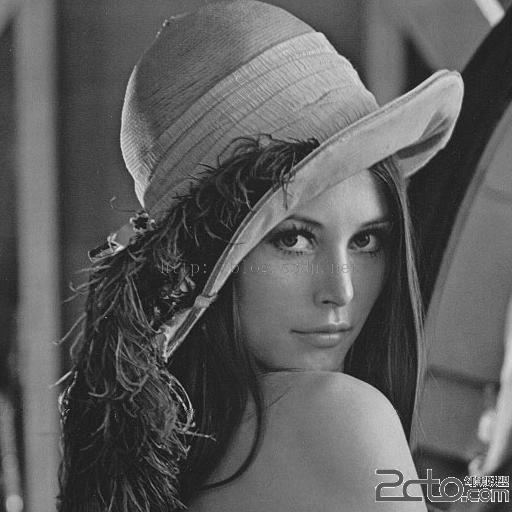

In [26]:
lena = lena.convert('L')
lena

3、模式“P”

模式“P”为8位彩色图像，它的每个像素用8个bit表示，其对应的彩色值是按照调色板查询出来的。

下面我们使用默认的调色板将lena图像转换为“P”图像。

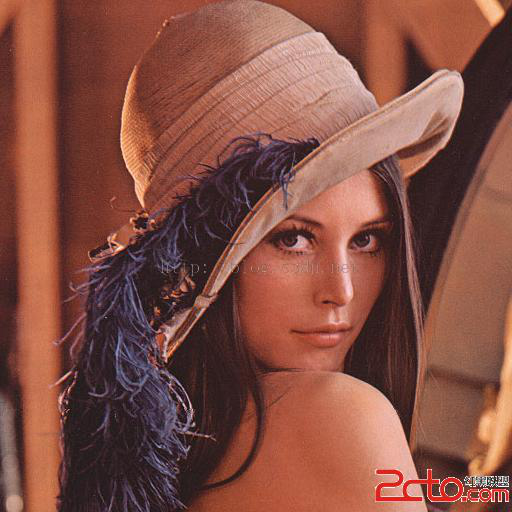

In [27]:
lena = Image.open('/sdcard/1/img/lena.jpg')

lena.convert('P')
lena

4、模式“RGBA”

模式“RGBA”为32位彩色图像，它的每个像素用32个bit表示，其中24bit表示红色、绿色和蓝色三个通道，另外8bit表示alpha通道，即透明通道。

下面我们将模式为“RGB”的lena图像转换为“RGBA”图像。

In [28]:
lena = Image.open('/sdcard/1/img/lena.jpg')

lena = lena.convert('RGBA')

lena.mode, lena.size

('RGBA', (512, 512))

In [29]:
lena.getpixel((80, 100))

(111, 54, 43, 255)

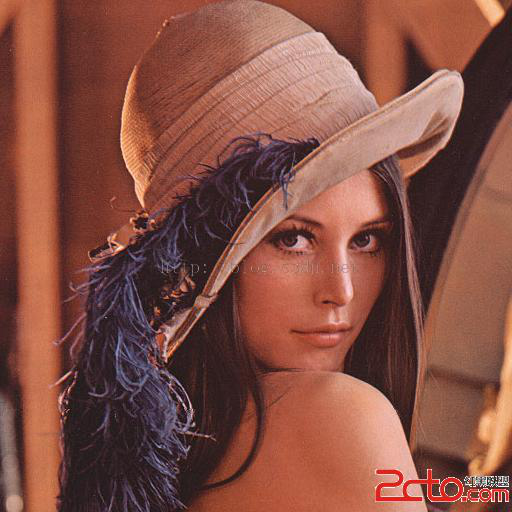

In [30]:
lena

# 图像转数组

In [31]:
arr = np.array(im).astype('float')
arr.shape

(534, 401, 3)

# 数组转图像函数

In [30]:
def arr2img(arr):
    print(arr.shape)
    return Image.fromarray(arr.astype('uint8'))

# 常见的滤波器

In [46]:
import numpy as np



f0 = np.mat(np.random.random((3, 3)))

f1 = np.mat([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]

])

# edge detection

# --------------边缘检测-------------

f2 = np.mat([

    [1, 0, -1],

    [0, 0, 0],

    [-1, 0, 1]
])

f3 = np.mat([

    [0, 1, 0],

    [1, -4, 1],

    [0, 1, 0]

])

# 强烈

f4 = np.mat([

    [-1, -1, -1],

    [-1, 8, -1],

    [-1, -1, -1]

])

# 垂直边检测
f9 = np.mat([

    [1, 0, -1],

    [1, 0, -1],

    [1, 0, -1]
])

# .水平边检测
f10 = np.mat([

    [1, 1, 1],

    [0, 0, 0],

    [-1, -1, -1]
])
#-------------end-----------------

# sharpen 边缘锐化

f5 = np.mat([

    [0, -1, 0],

    [-1, 5, -1],

    [0, -1, 0]

])

# boxblur

f6 = 1/9*np.mat([

    [1, 1, 1],

    [1, 1, 1],

    [1, 1, 1]

])

# Gaussian blur

f7 = 1/16*np.mat([

    [1, 2, 1],

    [2, 4, 2],

    [1, 2, 1]

])

# 曝光锐化

f8 = np.mat([

    [1, 0, 1],

    [0, 1, 0],

    [1, 0, 1]

])
# Roberts算子
f9 = np.mat([
    [1, 0],
    [0, -1],
])
f10 = np.mat([
    [0, 1],
    [-1, 0]
])

# Sobel算子
f11 = np.mat([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
f12 = np.mat([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

# 卷积神经网络流程

# 1.1卷积计算

In [33]:
''' 
M = np.ones((498, 498))
for i in range(500-3+1):
    for j in range(500-3+1):
        A = arr[i:i+3, j:j+3]
        t = np.array(A)*np.array(f5)
        M[i, j] = t.sum()
M[:20, 250]
''' 
# 二维卷积函数
def Conv(arr, f, Type, step=1):
    '''
    arr: 是矩阵
    f:   过滤器
    step: 步幅
    padding:2
    '''
    padding = 0
    w, h = arr.shape
    x, y = f.shape
    M = np.zeros(((w-x)//step+1+padding, (h-y)//step+1+padding))
    # M = np.ones((w+padding, h+padding))
    for i in range(0, w-x, step):
        for j in range(0, h-y, step):
            A = arr[i:i+x, j:j+y]
            # 卷积
            t = np.array(A) * np.array(f)
            # 池化，包括几种方式:
            # 最大值，平均值，求和等
            if Type == 'm':
                p = t.mean()
            elif Type == 'M':
                p = t.max()
            elif Type == 's':
                p = t.sum()
            elif Type == 'l':
                p = t.min()
            M[i//step+padding//2, j//step+padding//2] = p
    return M

# 池化函数
def pool_(arr):
    w, h = arr.shape
    M = np.array(arr)
    f = np.mat([
        [1, 1],
        [1, 1]
    ])
    for i in range(w):
        for j in range(h):
            A = arr[i:i+2,j:j+2]
            t = np.array(A)*np.array(f)
            M[i, j] = t.max()
    return M



# 2.1 Relu 非线性化

In [34]:
def relu(arr):
    return arr.clip(0, arr.max())

# 3.1 池化

In [35]:
def pool(arr):
    w, h = arr.shape
    f = np.ones((2, 2))
    M = np.zeros((w//2, h//2))
    for i in range(w//2):
        for j in range(h//2):
            M[i, j] = arr[i*2:i*2+2, j*2:j*2+2].max()
    return M
            

# 实例

(300, 300)


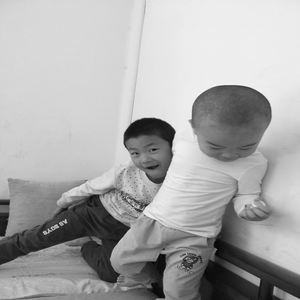

In [47]:
img2 = Image.open('/sdcard/1/img_base/boy2.jpg')
img = img2.resize((300, 300), Image.ANTIALIAS).convert('L')
#img = img.point(lambda x:0 if x<127  else 254)
arr = np.asarray(img).astype('float')
#print(arr.shape, img2.size)
#arr = arr*np.array()
#arr = arr*np.random.random((300, 300))*0.8
arr2img(arr)

1.1卷积

In [63]:
a = np.ones((2, 3))
x = np.pi/6
m, n = 2*np.cos(x)-3*np.sin(x), 2*np.sin(x)+np.cos(x)*3

#np.ones((m*10, n*10))
int(m*10),  int(n*10)

(2, 35)

[[-5  0 -5]
 [-4  2  1]
 [-5 -1 -2]]
(298, 298)


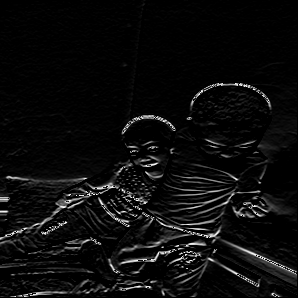

In [53]:
# .滤波器
f0 = np.random.random((3, 3))
# 零值规范化
f0 = (f0 - f0.mean())/f0.std()
f0 = np.mat([
    np.random.randint(-5, 5, 3),
    np.random.randint(-4, 4, 3),
    np.random.randint(-5, 5, 3)
])
#M = Conv(arr, f0, Type='M', step=1)
#M = Conv(arr, f0, Type='l', step=1)
# 垂直方向线条检测
M = Conv(arr, f12, Type='s', step=1)
print(f0)
arr2img(M)

2.1 非线性

(299, 299)


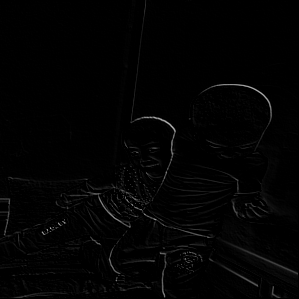

In [40]:
M = relu(M)
arr2img(M)

3.1池化

(149, 149)


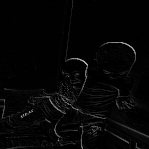

In [41]:
# 3.1池化
M = pool(M)
print(M.shape)
Image.fromarray(M.astype('uint8'))

====================================

1.2卷积

(148, 148)


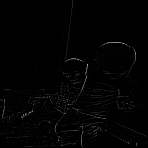

In [42]:
M = Conv(M, f9, Type='s', step=1)
arr2img(M)

2.2非线性

(148, 148)
(148, 148)


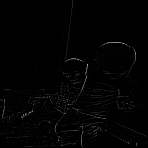

In [43]:
M = relu(M)
print(M.shape)
arr2img(M)

2.2池化

(74, 74)
(74, 74)


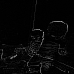

In [44]:
M = pool(M)
print(M.shape)
arr2img(M)

4.0 fc全连接

In [45]:
M

array([[  0.,   0.,   1., ...,   2.,   0.,   0.],
       [  2.,   2.,   2., ...,   1.,   0.,   1.],
       [  1.,   2.,   1., ...,   1.,   1.,   1.],
       ..., 
       [  3.,   5.,   0., ...,   4.,   5.,   8.],
       [  5.,   5.,   6., ...,  11.,   3.,   0.],
       [  1.,   0.,   0., ...,   4.,   6.,   2.]])

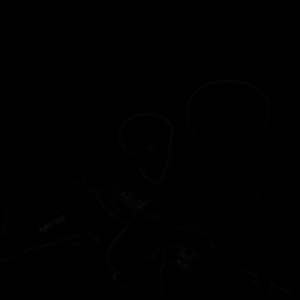

In [173]:
M.shape
M = (M-M.mean())/M.std()
Image.fromarray(M.astype('uint8'))

# 图像转像素

In [153]:
pixel = im.load()
type(pixel)

PixelAccess